In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Deep learning/BankNote_Authentication.csv")
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
print(df.shape)

(1372, 5)


In this case, we can confirm that the dataset has **5** variables (4 input and one output) and that the dataset has **1,372** rows of data.

**The banknote dataset involves predicting whether a given banknote is authentic given a number of measures taken from a photograph.**

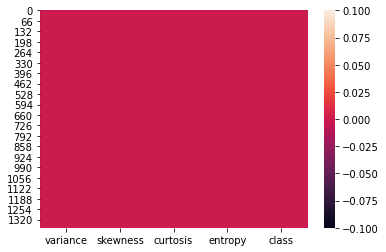

In [4]:
#Check null value
import seaborn as sns
sns.heatmap(df.isnull())
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
#Separate input and output from dataset
X=df.drop("class",axis=1)
Y=df["class"]

In [7]:
#train test split : 70%-30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [8]:
print(X_train.shape)
print(Y_train.shape)
print(Y_test.shape)

(960, 4)
(960,)
(412,)


In [9]:
#apply scaling on X_train and X_test data
from sklearn.preprocessing import StandardScaler
#create the object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [10]:
X_train

array([[ 0.10527877, -0.27983064,  0.2259937 ,  0.78802844],
       [-0.99840564, -1.18889897,  1.31324557,  0.52830217],
       [-0.4363023 , -0.32105208, -0.31909545,  0.38825872],
       ...,
       [-1.71754187,  0.71675177, -0.17167062, -2.05109895],
       [ 0.57142352,  0.01090731,  0.22034811,  0.51719724],
       [-0.98516431,  0.29693578, -0.48180637, -0.03803285]])

#Create Neural network architecture DNN (Deep Neural Network)

In [ ]:

import tensorflow as tf
#create object of Sequential  class
model=tf.keras.Sequential([
            tf.keras.layers.Dense(7,activation='relu',input_shape=(X.shape[1],)), #hidden layer1  
             tf.keras.layers.Dense(3,activation='relu'), #second hidden layer
              tf.keras.layers.Dense(1,activation='sigmoid') #output layer          
])

**To display summary of model**

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 35        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


#compile the model

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#Train the model and also check model is overfit or not then use validation_data parameter and passing
#the value of 30% testing data (input and output)

In [14]:
trained_model=model.fit(X_train, Y_train,batch_size=32, epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
30/30 [==============================] - 1s 13ms/step - loss: 0.8565 - accuracy: 0.4604 - val_loss: 0.8156 - val_accuracy: 0.4733
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.7622 - accuracy: 0.5219 - val_loss: 0.7346 - val_accuracy: 0.5146
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5698 - val_loss: 0.6770 - val_accuracy: 0.5583
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.6281 - val_loss: 0.6305 - val_accuracy: 0.6335
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6040 - accuracy: 0.6802 - val_loss: 0.5904 - val_accuracy: 0.6820
Epoch 6/100
30/30 [==============================] - 0s 3ms/step - loss: 0.5671 - accuracy: 0.7188 - val_loss: 0.5549 - val_accuracy: 0.7160
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.7406 - val_loss: 0.5242 - val_accuracy: 0.7451
Epoch 8/100


In [15]:
print("Testing Error and Accuracy of Testing Data : ",model.evaluate(X_test, Y_test) )

13/13 [==============================] - 0s 1ms/step - loss: 0.0650 - accuracy: 1.0000
Testing Error and Accuracy of Testing Data :  [0.06504861265420914, 1.0]


#visualise training error(loss) and testing error (loss)

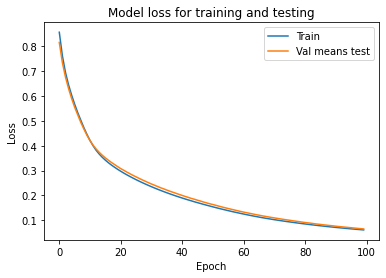

In [16]:
plt.plot(trained_model.history['loss']) #training's loss means error
plt.plot(trained_model.history['val_loss']) #testing's loss means error
plt.title('Model loss for training and testing')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val means test'], loc='upper right')#loc means location
plt.show()

In [18]:
Y_pred=model.predict(X_test)  #give probability value Y_pred=1/(1+exp(-X))
print(Y_pred)

[[0.9999515 ]
 [0.09970874]
 [0.99875677]
 [0.99886554]
 [0.09970874]
 [0.09970874]
 [0.09970874]
 [0.09970874]
 [0.09970874]
 [0.09970874]
 [0.09970874]
 [0.99786717]
 [0.09970874]
 [0.9852134 ]
 [0.99992836]
 [0.09970874]
 [0.09970874]
 [0.09970874]
 [0.09970874]
 [0.09970874]
 [0.99991167]
 [0.09970874]
 [0.09970874]
 [0.9990808 ]
 [0.9920946 ]
 [0.9961015 ]
 [0.09970874]
 [0.09970874]
 [0.9998353 ]
 [0.09970874]
 [0.09970874]
 [0.09970874]
 [0.9995552 ]
 [0.99998397]
 [0.09970874]
 [0.99823934]
 [0.9999536 ]
 [0.09970874]
 [0.9998367 ]
 [0.09970874]
 [0.09970874]
 [0.09970874]
 [0.09970874]
 [0.09970874]
 [0.98552364]
 [0.9987038 ]
 [0.09970874]
 [0.09970874]
 [0.09970874]
 [0.9994898 ]
 [0.15553734]
 [0.09970874]
 [0.9994421 ]
 [0.09970874]
 [0.09970874]
 [0.9763132 ]
 [0.9998541 ]
 [0.09970874]
 [0.09970874]
 [0.9998735 ]
 [0.9999864 ]
 [0.999936  ]
 [0.99999404]
 [0.9992459 ]
 [0.99505293]
 [0.98612213]
 [0.09970874]
 [0.99203557]
 [0.9998409 ]
 [0.09970874]
 [0.09970874]
 [0.99

In [19]:
Y_pred=np.where(Y_pred>=0.5,1,0)
print(Y_pred)

[[1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]


#generate report

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       177

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

[[235   0]
 [  0 177]]


In this case, we can see that the model achieved great or perfect accuracy of 100% percent. This might suggest that the prediction problem is easy and/or that neural networks are a good fit for the problem.

Accuracy: 1.000
